In [2]:
'''
Q1. Implement Linear Regression
Dataset: Use the Advertising.csv
(https:/raw.githubusercontent.com/selva86/datasets/master/Advertising.csv) 
Task:
I. Load the dataset and use TV. Radio, and Newspaper as features to predict Sales
II. Split the data into training and testing sets
III. Implement and train a Linear Regression model using scikit-learn.
IV Calculate and print the Mean Squared Ertor (MSE) and R-squared (R^2) score for the test set.
'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
data = pd.read_csv(url)

# Use TV, radio, and newspaper as features to predict sales
X = data[["TV", "radio", "newspaper"]]
y = data["sales"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Implement and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate and print the Mean Squared Error (MSE) and R-squared (R^2) score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2) Score: {r2:.2f}")

Mean Squared Error (MSE): 3.17
R-squared (R^2) Score: 0.90


Accuracy: 1.00


/home/codespace/.local/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


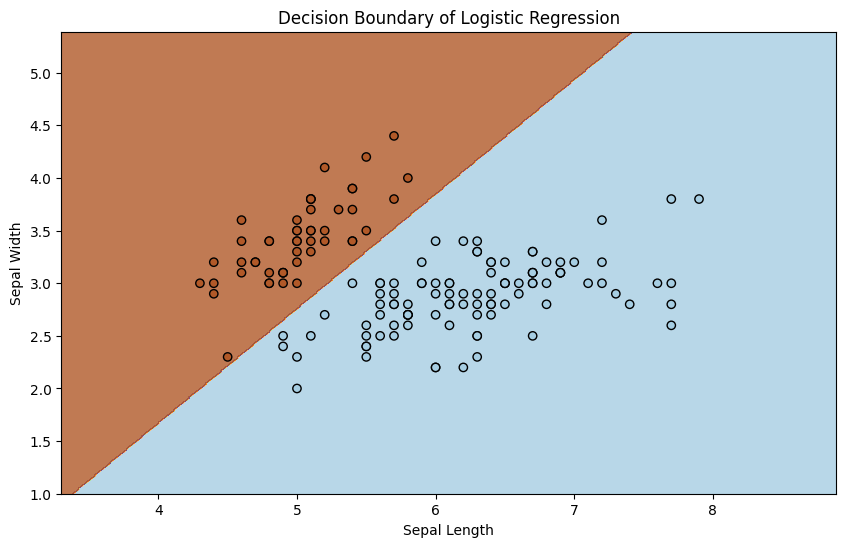

In [8]:
'''
Q2. Implement Logistic Regression
Dataset. Use the Iris Dataset from (https: raw.githubusercontent.com/utuc-cse/data-fa14/gh-pages/data/iris.csv)
Task: 
I. Load the dataset and classify whether the flower is "Iris-setosa" (binary classification)
II. Use sepal length and sepal width as features.
III. Train a Logistic Regression model using scikit-learn
IV. Visualize the decision boundary
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

# Load the dataset
url = "https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv"
data = pd.read_csv(url)

# Filter for binary classification: "setosa" vs others
data["Target"] = (data["species"] == "setosa").astype(int)  # 1 for "setosa", 0 otherwise

# Use sepal length and sepal width as features
X = data[["sepal_length", "sepal_width"]]
y = data["Target"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Visualize the decision boundary
x_min, x_max = X["sepal_length"].min() - 1, X["sepal_length"].max() + 1
y_min, y_max = X["sepal_width"].min() - 1, X["sepal_width"].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X["sepal_length"], X["sepal_width"], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.title("Decision Boundary of Logistic Regression")
plt.show()
